In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

### Linear Regression


- Useful when the target relationship is not complex or enough data is not available
- It's a linear approach that checks the relationship between the target and the features
- y = mx + b => we have to find (parameter learning - maybe with gradient descent) the **m** and **b** values that best fit the data

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
linear_regression_score = mean_squared_error(y_test, y_pred)
print('Linear Regression Score: ', linear_regression_score)

Linear Regression Score:  0.42420408998018416


### K - Nearest Neighbors

- Exactly the same as classification => feature similarity
- The new point is assigned the value based on how closely it resembles the k points in training data
- Normally in classification we use mode and in regression we use **mean/average**

In [7]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
knn_regression_score = mean_squared_error(y_test, y_pred)
print('KNN Regression Score: ', knn_regression_score)

KNN Regression Score:  0.5624999999999999


### Random Forest

- Similar to classification but the difference is in the decision trees
- DT have also yes/no values but end with a continuous value (e.g 459,09)

In [10]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rf_regression_score = mean_squared_error(y_test, y_pred)
print('Random Forest Regression Score: ', rf_regression_score)


Random Forest Regression Score:  0.35551458333333336


### Ridge Regression

- Used when data suffer from **multicollinearity** => independent variables are highly correlated 
- Uses **L2 regularization**
- Penalize some weights in order to prevent overfitting
- We add a shrink param (in this case is squared) to have a very low variance

In [11]:
from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
ridge_regression_score = mean_squared_error(y_test, y_pred)
print('Ridge Regression Score: ', ridge_regression_score)

Ridge Regression Score:  0.4266339642743733


### Lasso Regression


- Used when data suffer from **multicollinearity** => independent variables are highly correlated 
- Uses **L1 regularization**
- It wieghts erros at their **absolute value**, instead of, for ex, L2 regularization, which weights erros at their square to punish higher errors more

In [12]:
from sklearn.linear_model import Lasso

reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
lasso_regression_score = mean_squared_error(y_test, y_pred)
print('Lasso Regression Score: ', lasso_regression_score)

Lasso Regression Score:  0.6496296277606727


### ElasticNet Regression

Seeks to take the best from ridge and lasso regression by **combining L1 and L2 regularizations**

In [13]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
elastic_regression_score = mean_squared_error(y_test, y_pred)
print('Elastic Net Regression Score: ', elastic_regression_score)

Elastic Net Regression Score:  0.6501944451466248


## Results

In [16]:
scores = [
    [linear_regression_score,'Linear Regression'],
    [knn_regression_score,'KNN'], 
    [rf_regression_score, 'Random Forest'],
    [ridge_regression_score, 'Ridge Regression'],
    [lasso_regression_score, 'Lasso Regression'],
    [elastic_regression_score, 'Elastic Net'],]
results_df = pd.DataFrame(data = scores, columns=['Mean Squared Error', 'Regressor'])

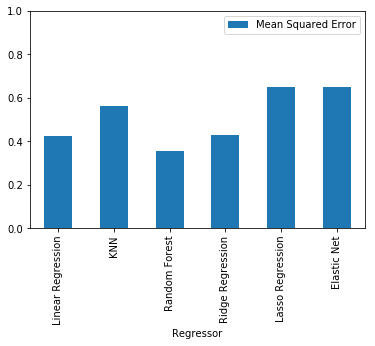

In [19]:
from matplotlib import pyplot as plt
results_df.plot.bar(x='Regressor', y='Mean Squared Error', ylim=[0,1])
plt.show()